Dataset Shape: (1118669, 36)


,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating,year,revenue
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,"123,614.29",27.91,...,5.00,Delivered,1,2015,1,0.19,True,4.70,2015,"89,112.17"
1,TXN_2015_00000002,2015-05-01,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,"54,731.86",0.00,...,4.50,Delivered,1,2015,1,0.20,True,4.10,2015,"54,731.86"
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,"97,644.25",46.93,...,NaN,Delivered,1,2015,1,0.17,True,3.30,2015,"103,636.52"
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,"21,947.26",0.00,...,3.00,Delivered,1,2015,1,0.22,True,3.50,2015,"21,947.26"
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,"54,731.86",0.00,...,4.00,Delivered,1,2015,1,0.20,True,4.10,2015,"109,463.72"


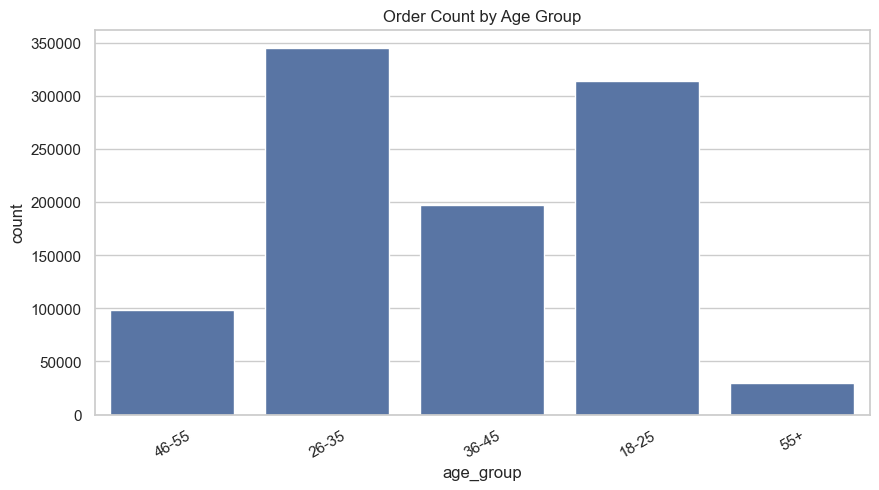

,age_group,total_revenue,orders,avg_order_value
1,26-35,"23,641,815,636.77",345161,"68,495.04"
0,18-25,"21,443,158,690.58",313894,"68,313.38"
2,36-45,"13,460,292,416.44",197500,"68,153.38"
3,46-55,"6,697,770,792.78",98236,"68,180.41"
4,55+,"2,006,024,296.85",29599,"67,773.38"


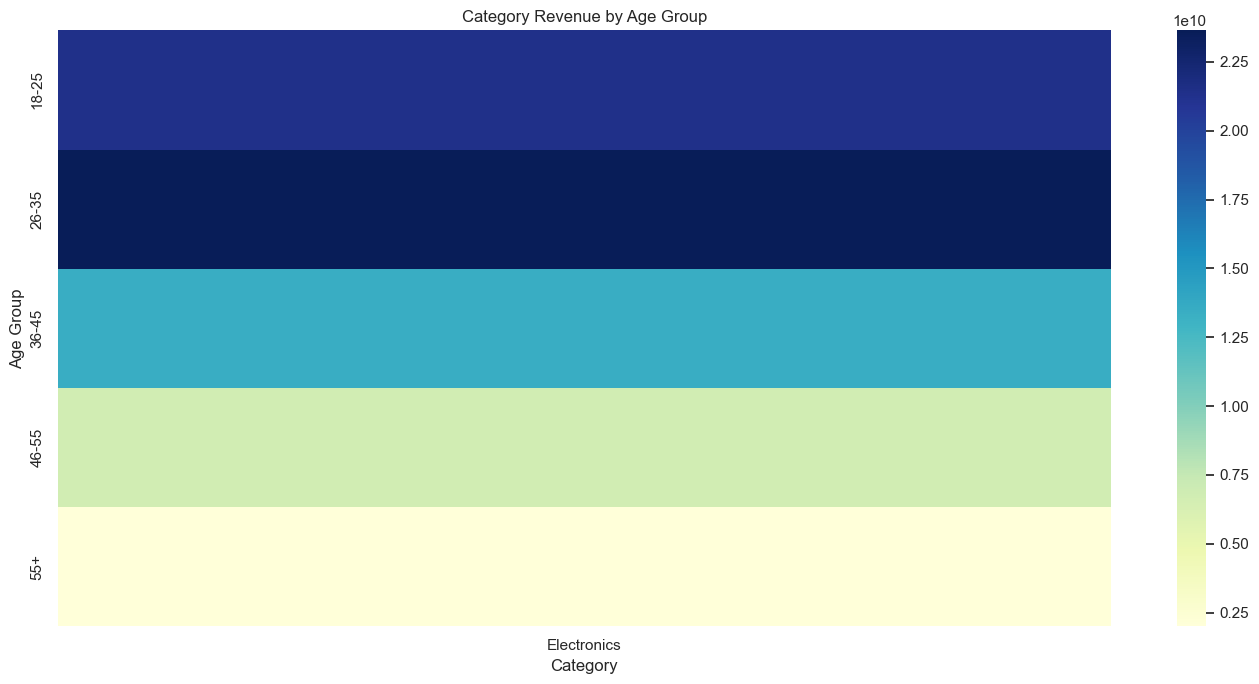

,age_group,orders,customers,orders_per_customer
0,18-25,313894,108861,2.88
1,26-35,345161,120359,2.87
2,36-45,197500,68472,2.88
3,46-55,98236,34066,2.88
4,55+,29599,10404,2.84


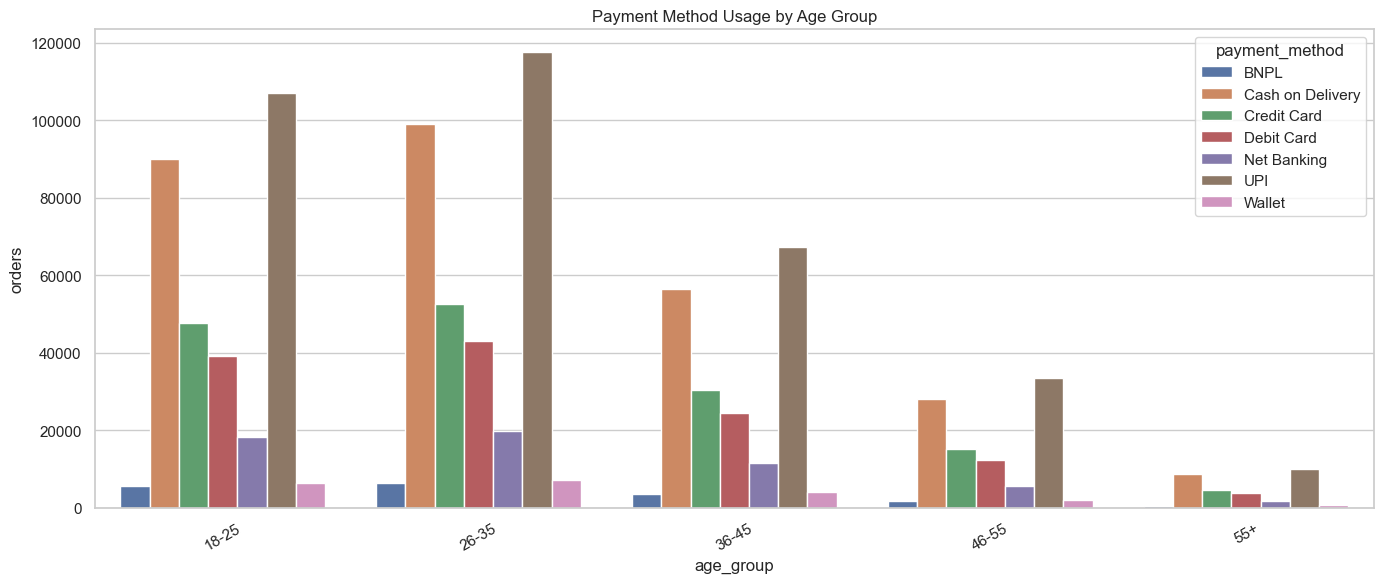

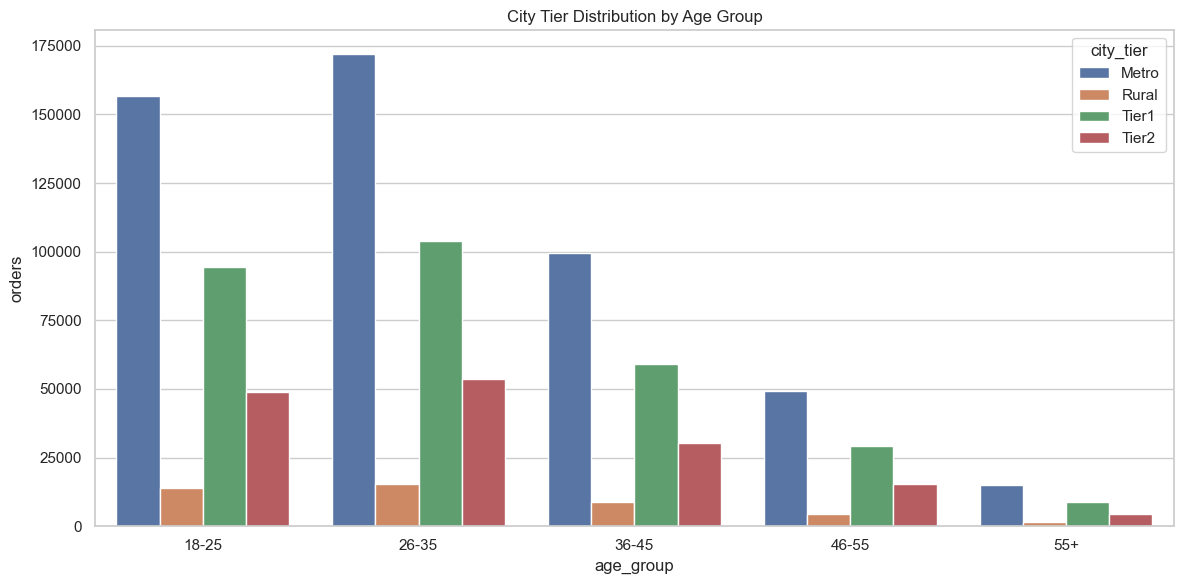

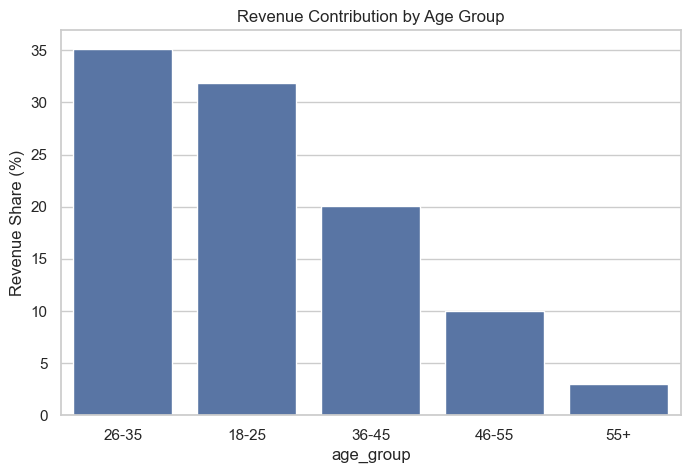

,age_group,total_revenue,orders_x,avg_order_value,Revenue Share (%),orders_y,customers,orders_per_customer
0,26-35,"23,641,815,636.77",345161,"68,495.04",35.16,345161,120359,2.87
1,18-25,"21,443,158,690.58",313894,"68,313.38",31.89,313894,108861,2.88
2,36-45,"13,460,292,416.44",197500,"68,153.38",20.02,197500,68472,2.88
3,46-55,"6,697,770,792.78",98236,"68,180.41",9.96,98236,34066,2.88
4,55+,"2,006,024,296.85",29599,"67,773.38",2.98,29599,10404,2.84


✅ EDA_08 DEMOGRAPHICS ANALYSIS COMPLETE


In [3]:
# ============================================================
# EDA_08 : CUSTOMER DEMOGRAPHICS & AGE SEGMENTS
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
sns.set(style="whitegrid")

# ============================================================
# LOAD MASTER DATA
# ============================================================

df = pd.read_csv("../master/amazon_india_master_2015_2025.csv")
# Rename for convenience
df.rename(columns={"customer_age_group": "age_group"}, inplace=True)
# ===============================
# STANDARDIZE COLUMN NAMES
# ===============================

df.rename(columns={
    "customer_age_group": "age_group",
    "customer_tier": "city_tier"
}, inplace=True)

df["order_date"] = pd.to_datetime(df["order_date"])
df["year"] = df["order_date"].dt.year
df["revenue"] = df["final_amount_inr"]

print("Dataset Shape:", df.shape)
display(df.head())

# ============================================================
# AGE GROUP DISTRIBUTION
# ============================================================

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="age_group")
plt.title("Order Count by Age Group")
plt.xticks(rotation=30)
plt.show()

# ============================================================
# SPENDING BY AGE GROUP
# ============================================================

age_revenue = (
    df.groupby("age_group")
      .agg(
          total_revenue=("revenue","sum"),
          orders=("transaction_id","count"),
          avg_order_value=("revenue","mean")
      )
      .reset_index()
      .sort_values("total_revenue", ascending=False)
)

display(age_revenue)

# ============================================================
# CATEGORY PREFERENCE BY AGE GROUP
# ============================================================

age_category = (
    df.groupby(["age_group","category"])
      .agg(revenue=("revenue","sum"))
      .reset_index()
)

heatmap_df = age_category.pivot_table(
    index="age_group",
    columns="category",
    values="revenue",
    fill_value=0
)

plt.figure(figsize=(14,7))
sns.heatmap(heatmap_df, cmap="YlGnBu", fmt=".0f")
plt.title("Category Revenue by Age Group")
plt.ylabel("Age Group")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# ============================================================
# SHOPPING FREQUENCY BY AGE
# ============================================================

freq = (
    df.groupby("age_group")
      .agg(
          orders=("transaction_id","count"),
          customers=("customer_id","nunique")
      )
      .reset_index()
)

freq["orders_per_customer"] = freq["orders"] / freq["customers"]

display(freq)

# ============================================================
# PAYMENT METHOD PREFERENCE BY AGE
# ============================================================

payment_age = (
    df.groupby(["age_group","payment_method"])
      .size()
      .reset_index(name="orders")
)

plt.figure(figsize=(14,6))
sns.barplot(data=payment_age, x="age_group", y="orders", hue="payment_method")
plt.xticks(rotation=30)
plt.title("Payment Method Usage by Age Group")
plt.tight_layout()
plt.show()

# ============================================================
# TIER DISTRIBUTION BY AGE
# ============================================================

tier_age = (
    df.groupby(["age_group","city_tier"])
      .size()
      .reset_index(name="orders")
)

plt.figure(figsize=(12,6))
sns.barplot(data=tier_age, x="age_group", y="orders", hue="city_tier")
plt.title("City Tier Distribution by Age Group")
plt.tight_layout()
plt.show()

# ============================================================
# % CONTRIBUTION BY AGE GROUP
# ============================================================

age_revenue["Revenue Share (%)"] = (
    age_revenue["total_revenue"] /
    age_revenue["total_revenue"].sum() * 100
)

plt.figure(figsize=(8,5))
sns.barplot(data=age_revenue, x="age_group", y="Revenue Share (%)")
plt.title("Revenue Contribution by Age Group")
plt.show()

# ============================================================
# EXECUTIVE INSIGHTS TABLE
# ============================================================

insights = age_revenue.merge(freq, on="age_group")

display(insights)

print("✅ EDA_08 DEMOGRAPHICS ANALYSIS COMPLETE")
